In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

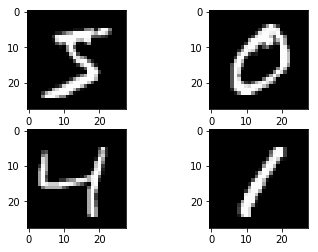

In [3]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [5]:
seed = 7
numpy.random.seed(seed)

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
def baseline_model():
    model = Sequential()
    
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
model = baseline_model()

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, kernel_initializer="normal", activation="relu", input_dim=784)`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="normal", activation="softmax")`
  """


In [11]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
84s - loss: 0.2915 - acc: 0.9168 - val_loss: 0.1477 - val_acc: 0.9556
Epoch 2/10
4s - loss: 0.1147 - acc: 0.9670 - val_loss: 0.0936 - val_acc: 0.9707
Epoch 3/10
4s - loss: 0.0743 - acc: 0.9788 - val_loss: 0.0824 - val_acc: 0.9758
Epoch 4/10
4s - loss: 0.0525 - acc: 0.9848 - val_loss: 0.0761 - val_acc: 0.9774
Epoch 5/10
4s - loss: 0.0380 - acc: 0.9893 - val_loss: 0.0665 - val_acc: 0.9791
Epoch 6/10
4s - loss: 0.0278 - acc: 0.9926 - val_loss: 0.0670 - val_acc: 0.9788
Epoch 7/10
4s - loss: 0.0217 - acc: 0.9945 - val_loss: 0.0601 - val_acc: 0.9822
Epoch 8/10
4s - loss: 0.0139 - acc: 0.9970 - val_loss: 0.0618 - val_acc: 0.9815
Epoch 9/10
4s - loss: 0.0114 - acc: 0.9976 - val_loss: 0.0578 - val_acc: 0.9821
Epoch 10/10
4s - loss: 0.0082 - acc: 0.9987 - val_loss: 0.0590 - val_acc: 0.9819


In [12]:
scores = model.evaluate(X_test,y_test,verbose=0)

In [13]:
print("Baseline error : %.2f%%"%(100-scores[1]*100))

Baseline error : 1.81%


In [14]:
model.predict_classes(X_test)

 9792/10000 [============================>.] - ETA: 0s

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290.0
Trainable params: 623,290
Non-trainable params: 0.0
_________________________________________________________________


In [16]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 784),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'RandomNormal',
    'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 784,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'softmax',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'RandomNormal',
    'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
   'kernel_regularizer': None,
   'name': 'dense_2',
   'trainable': True,
   'units': 10,
   'use_bias': 

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))